In [ ]:
S. Sri Sai Siri (22WU0104147), AI&ML - B 

In [11]:
#experiment_1
import numpy as np

# Define the inputs, weights, and bias
inputs = np.array([1, 0])  # Example input
weights = np.array([0.5, -0.6])  # Example weights
bias = 0.2  # Example bias

# Define the activation function (Sigmoid function)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Compute the output of the neuron
def single_neuron(inputs, weights, bias):
    # Weighted sum
    z = np.dot(inputs, weights) + bias
    # Apply activation function
    output = sigmoid(z)
    return z, output

# Perform computation
z, output = single_neuron(inputs, weights, bias)

# Print the details and result
print("Inputs:", inputs)
print("Weights:", weights)
print("Bias:", bias)
print("Activation Function: Sigmoid")
print("Weighted Sum (z):", z)
print("Output of the Neuron (Sigmoid(z)):", output)

# Binary classification (threshold at 0.5)
classification = 1 if output >= 0.5 else 0
print("Binary Classification Result:", classification)

Inputs: [1 0]
Weights: [ 0.5 -0.6]
Bias: 0.2
Activation Function: Sigmoid
Weighted Sum (z): 0.7
Output of the Neuron (Sigmoid(z)): 0.6681877721681662
Binary Classification Result: 1


In [7]:
#experiment_2
import numpy as np

# Define the activation function (Step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Define the perceptron training function
def train_perceptron(inputs, labels, learning_rate, epochs):
    num_features = inputs.shape[1]
    weights = np.zeros(num_features)  # Initialize weights to zero
    bias = 0  # Initialize bias to zero

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}")
        for i in range(len(inputs)):
            # Compute weighted sum
            z = np.dot(inputs[i], weights) + bias
            # Apply step activation function
            prediction = step_function(z)
            # Update weights and bias if there's an error
            error = labels[i] - prediction
            weights += learning_rate * error * inputs[i]
            bias += learning_rate * error
            print(f"Input: {inputs[i]}, Target: {labels[i]}, Prediction: {prediction}, Error: {error}")
            print(f"Updated Weights: {weights}, Updated Bias: {bias}")

    return weights, bias

# Define the perceptron testing function
def test_perceptron(inputs, weights, bias):
    predictions = []
    for i in range(len(inputs)):
        z = np.dot(inputs[i], weights) + bias
        predictions.append(step_function(z))
    return predictions

# AND Gate Dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels_and = np.array([0, 0, 0, 1])  # AND gate labels

# OR Gate Dataset
labels_or = np.array([0, 1, 1, 1])  # OR gate labels

# Training parameters
learning_rate = 0.1
epochs = 10

# Train and test the perceptron for AND gate
print("Training Perceptron for AND Gate:")
weights_and, bias_and = train_perceptron(inputs, labels_and, learning_rate, epochs)
print("\nTesting Perceptron for AND Gate:")
predictions_and = test_perceptron(inputs, weights_and, bias_and)
print(f"Final Weights: {weights_and}, Final Bias: {bias_and}")
print(f"Predictions for AND Gate: {predictions_and}")

# Train and test the perceptron for OR gate
print("\nTraining Perceptron for OR Gate:")
weights_or, bias_or = train_perceptron(inputs, labels_or, learning_rate, epochs)
print("\nTesting Perceptron for OR Gate:")
predictions_or = test_perceptron(inputs, weights_or, bias_or)
print(f"Final Weights: {weights_or}, Final Bias: {bias_or}")
print(f"Predictions for OR Gate: {predictions_or}")

Training Perceptron for AND Gate:

Epoch 1
Input: [0 0], Target: 0, Prediction: 1, Error: -1
Updated Weights: [0. 0.], Updated Bias: -0.1
Input: [0 1], Target: 0, Prediction: 0, Error: 0
Updated Weights: [0. 0.], Updated Bias: -0.1
Input: [1 0], Target: 0, Prediction: 0, Error: 0
Updated Weights: [0. 0.], Updated Bias: -0.1
Input: [1 1], Target: 1, Prediction: 0, Error: 1
Updated Weights: [0.1 0.1], Updated Bias: 0.0

Epoch 2
Input: [0 0], Target: 0, Prediction: 1, Error: -1
Updated Weights: [0.1 0.1], Updated Bias: -0.1
Input: [0 1], Target: 0, Prediction: 1, Error: -1
Updated Weights: [0.1 0. ], Updated Bias: -0.2
Input: [1 0], Target: 0, Prediction: 0, Error: 0
Updated Weights: [0.1 0. ], Updated Bias: -0.2
Input: [1 1], Target: 1, Prediction: 0, Error: 1
Updated Weights: [0.2 0.1], Updated Bias: -0.1

Epoch 3
Input: [0 0], Target: 0, Prediction: 0, Error: 0
Updated Weights: [0.2 0.1], Updated Bias: -0.1
Input: [0 1], Target: 0, Prediction: 1, Error: -1
Updated Weights: [0.2 0. ], U

In [9]:
#experiment_3
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the XOR dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([[0], [1], [1], [0]])  # XOR outputs

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
weights_input_hidden = np.random.uniform(-1, 1, (2, 2))  # 2 input neurons, 2 hidden neurons
bias_hidden = np.random.uniform(-1, 1, (1, 2))  # Bias for hidden layer
weights_hidden_output = np.random.uniform(-1, 1, (2, 1))  # 2 hidden neurons, 1 output neuron
bias_output = np.random.uniform(-1, 1, (1, 1))  # Bias for output layer

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training process
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = labels - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Print error every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch + 1}, Error: {np.mean(np.abs(error))}")

# Testing the trained MLP
print("\nTesting MLP on XOR inputs:")
for i, input_data in enumerate(inputs):
    hidden_layer_input = np.dot(input_data, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    print(f"Input: {input_data}, Predicted Output: {predicted_output[0][0]:.4f}, Target: {labels[i][0]}")


Epoch 1000, Error: 0.49987836116688295
Epoch 2000, Error: 0.4992697984295835
Epoch 3000, Error: 0.49208700218528123
Epoch 4000, Error: 0.41447346739243096
Epoch 5000, Error: 0.21863648495745003
Epoch 6000, Error: 0.12837989212095835
Epoch 7000, Error: 0.09425401375517167
Epoch 8000, Error: 0.07659986814990018
Epoch 9000, Error: 0.06566563704906384
Epoch 10000, Error: 0.058136377146265565

Testing MLP on XOR inputs:
Input: [0 0], Predicted Output: 0.0616, Target: 0
Input: [0 1], Predicted Output: 0.9442, Target: 1
Input: [1 0], Predicted Output: 0.9442, Target: 1
Input: [1 1], Predicted Output: 0.0593, Target: 0


Sample Outputs for Sigmoid:
[4.53978687e-05 5.55606489e-05 6.79983174e-05 8.32200197e-05
 1.01848815e-04]

Sample Outputs for ReLU:
[0. 0. 0. 0. 0.]

Sample Outputs for Tanh:
[-1.         -0.99999999 -0.99999999 -0.99999999 -0.99999998]


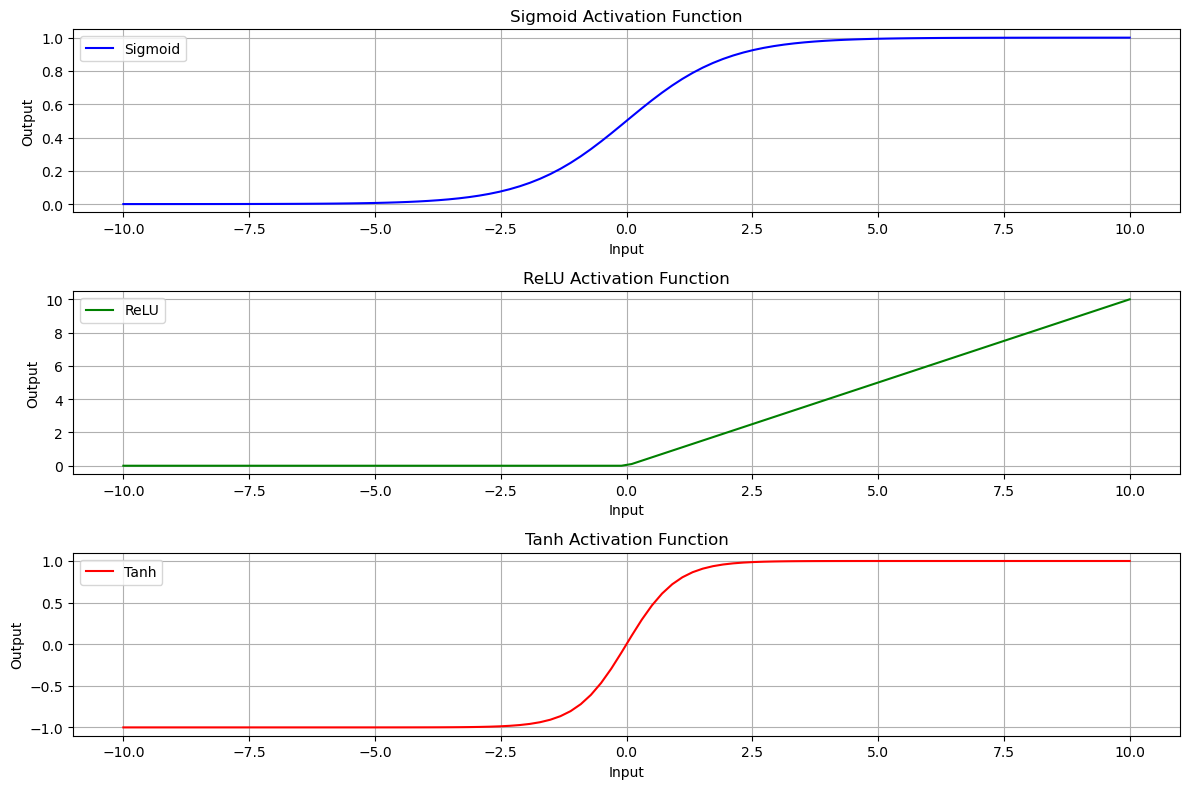

In [14]:
#experiment_4
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Define a dataset (a range of inputs)
x = np.linspace(-10, 10, 100)

# Compute outputs for each activation function
sigmoid_output = sigmoid(x)
relu_output = relu(x)
tanh_output = tanh(x)

# Print sample outputs for comparison
print("Sample Outputs for Sigmoid:")
print(sigmoid_output[:5])
print("\nSample Outputs for ReLU:")
print(relu_output[:5])
print("\nSample Outputs for Tanh:")
print(tanh_output[:5])

# Plot the activation functions
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x, sigmoid_output, label="Sigmoid", color="blue")
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x, relu_output, label="ReLU", color="green")
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(x, tanh_output, label="Tanh", color="red")
plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
#experiment_5
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input data (2 samples with 2 features each)
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Example: XOR inputs
labels = np.array([[0], [1], [1], [0]])  # Target outputs (XOR outputs)

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
weights_input_hidden = np.random.uniform(-1, 1, (2, 2))  # 2 input neurons, 2 hidden neurons
bias_hidden = np.random.uniform(-1, 1, (1, 2))  # Bias for hidden layer
weights_hidden_output = np.random.uniform(-1, 1, (2, 1))  # 2 hidden neurons, 1 output neuron
bias_output = np.random.uniform(-1, 1, (1, 1))  # Bias for output layer

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward Propagation
    # Step 1: Input to hidden layer
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Step 2: Hidden to output layer
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    # Step 1: Calculate the error
    error = labels - predicted_output

    # Step 2: Calculate gradients for the output layer
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    # Step 3: Calculate gradients for the hidden layer
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Print error every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch + 1}, Error: {np.mean(np.abs(error))}")

# Testing the trained neural network
print("\nTesting the 2-layer neural network:")
for i, input_data in enumerate(inputs):
    hidden_layer_input = np.dot(input_data, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    print(f"Input: {input_data}, Predicted Output: {predicted_output[0][0]:.4f}, Target: {labels[i][0]}")

Epoch 1000, Error: 0.49987836116688295
Epoch 2000, Error: 0.4992697984295835
Epoch 3000, Error: 0.49208700218528123
Epoch 4000, Error: 0.41447346739243096
Epoch 5000, Error: 0.21863648495745003
Epoch 6000, Error: 0.12837989212095835
Epoch 7000, Error: 0.09425401375517167
Epoch 8000, Error: 0.07659986814990018
Epoch 9000, Error: 0.06566563704906384
Epoch 10000, Error: 0.058136377146265565

Testing the 2-layer neural network:
Input: [0 0], Predicted Output: 0.0616, Target: 0
Input: [0 1], Predicted Output: 0.9442, Target: 1
Input: [1 0], Predicted Output: 0.9442, Target: 1
Input: [1 1], Predicted Output: 0.0593, Target: 0
